# Australian Geoscience Datacube - Demo 

### Fei Zhang @Geoscience Australia

## AGDC Architecture

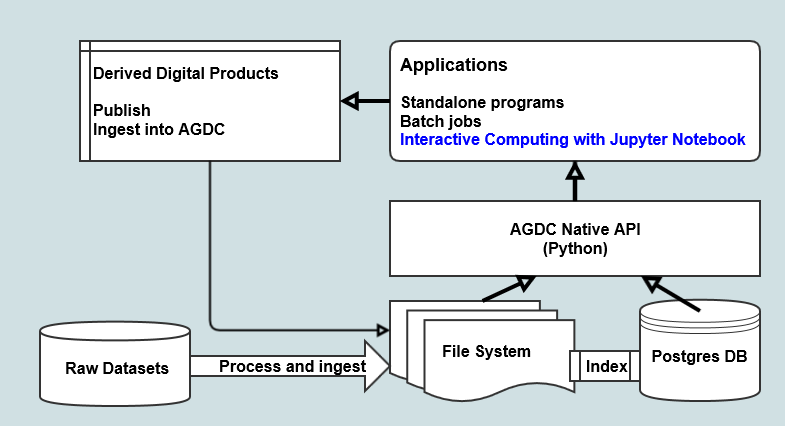

In [3]:
   
from IPython.display import Image
Image("imgs/AGDC_Arch.png")

## References

- AGDC Github: https://github.com/data-cube/agdc-v2

- WOfS Github: https://github.com/GeoscienceAustralia/wofs


## Interactive Computing

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pandas

import sys
sys.path.insert(0,'/home/547/fxz547/myGithub/agdc-v2')  #prepend a path

In [3]:
# import AGDC Python API modules

import datacube
from datacube.storage import masking

# Create an API data access object
dc = datacube.Datacube(app='PyconDemo')

dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://fxz547@130.56.244.227:6432/datacube)>>>

We can access the Postgres Database (metadata index) and its associated imagery data.

## Datacube Products List 
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [4]:
df_prodlist = dc.list_products()

df_prodlist.head()

name  \
id                                 
1   ls5_satellite_telemetry_data   
2               ls5_level1_scene   
3                 ls5_nbar_scene   
4                ls5_nbart_scene   
13  ls8_satellite_telemetry_data   

                                      description   platform  \
id                                                             
1              Landsat 5 Satellite Telemetry Data  LANDSAT_5   
2   Landsat 5 Level 1 At-sensor Radiance 25 metre  LANDSAT_5   
3                         Landsat 5 NBAR 25 metre  LANDSAT_5   
4                        Landsat 5 NBART 25 metre  LANDSAT_5   
13             Landsat 8 Satellite Telemetry Data  LANDSAT_8   

                product_type instrument   format  crs resolution tile_size  \
id                                                                           
1   satellite_telemetry_data         TM      NaN  NaN        NaN       NaN   
2                     level1         TM  GeoTiff  NaN        NaN       NaN   
3                       nbar         TM  GeoTiff  NaN        NaN       NaN   
4                      nbart         TM  GeoTiff  NaN        NaN       NaN   
13  satellite_telemetry_data   OLI_TIRS      NaN  NaN        NaN       NaN   

   spatial_dimensions  
id                     
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
13                NaN

## Measurements List of the Products

- Each of the datacube products may have multiple measurements.

- Measurements are related to the sensors characteristics,  also known as _bands_ in the remote-sensing domain.

- _bands_ comes from electromagnetic (or light-wave) spectral ranges, generally include Red-Green-Blue (RGB). 

In [5]:
df_measlist = dc.list_measurements()

df_measlist.head(10)

aliases  dtype flags_definition name  \
product         measurement                                                 
ls5_nbar_scene  1             [band_1, blue]  int16              NaN    1   
                2            [band_2, green]  int16              NaN    2   
                3              [band_3, red]  int16              NaN    3   
                4              [band_4, nir]  int16              NaN    4   
                5            [band_5, swir1]  int16              NaN    5   
                7            [band_7, swir2]  int16              NaN    7   
ls5_nbart_scene 1             [band_1, blue]  int16              NaN    1   
                2            [band_2, green]  int16              NaN    2   
                3              [band_3, red]  int16              NaN    3   
                4              [band_4, nir]  int16              NaN    4   

                            nodata  \
product         measurement          
ls5_nbar_scene  1             -999   
                2             -999   
                3             -999   
                4             -999   
                5             -999   
                7             -999   
ls5_nbart_scene 1             -999   
                2             -999   
                3             -999   
                4             -999   

                                                           spectral_definition  \
product         measurement                                                      
ls5_nbar_scene  1            {u'wavelength': [410, 411, 412, 413, 414, 415,...   
                2            {u'wavelength': [500, 501, 502, 503, 504, 505,...   
                3            {u'wavelength': [580, 590, 600, 605, 610, 611,...   
                4            {u'wavelength': [730, 735, 740, 745, 750, 751,...   
                5            {u'wavelength': [1514, 1515, 1517, 1519, 1521,...   
                7            {u'wavelength': [2000, 2001, 2003, 2005, 2007,...   
ls5_nbart_scene 1            {u'wavelength': [410, 411, 412, 413, 414, 415,...   
                2            {u'wavelength': [500, 501, 502, 503, 504, 505,...   
                3            {u'wavelength': [580, 590, 600, 605, 610, 611,...   
                4            {u'wavelength': [730, 735, 740, 745, 750, 751,...   

                            units  
product         measurement        
ls5_nbar_scene  1               1  
                2               1  
                3               1  
                4               1  
                5               1  
                7               1  
ls5_nbart_scene 1               1  
                2               1  
                3               1  
                4               1

## Retrieving data


In [6]:
#To see the function signature?
#dc.load?

In [7]:
xp=(149.00, 149.20); yp=(-35.25, -35.35)  # Lake Burley Griffin x=(149.07, 149.17), y=(-35.25, -35.35), 

# xp=( 149.160,  149.170); yp=(-35.34 , -35.35 )  #a small area cover GA water pond 

tp=('2015-01', '2015-12-31')

nbar = dc.load(product='ls8_nbar_albers', x=xp, y=yp, time=tp)


The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

In [8]:
nbar

<xarray.Dataset>
Dimensions:          (time: 75, x: 780, y: 539)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-02T23:50:19.500000 ...
  * y                (y) float64 -3.952e+06 -3.953e+06 -3.953e+06 -3.953e+06 ...
  * x                (x) float64 1.538e+06 1.538e+06 1.538e+06 1.538e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 473 425 435 517 523 488 467 450 475 ...
    blue             (time, y, x) int16 485 429 454 535 533 486 470 459 471 ...
    green            (time, y, x) int16 723 612 669 759 767 699 678 656 677 ...
    red              (time, y, x) int16 838 706 797 962 943 857 831 840 872 ...
    nir              (time, y, x) int16 2299 2201 2182 2129 2121 2043 2075 ...
    swir1            (time, y, x) int16 2939 2345 2783 2958 2931 2835 2688 ...
    swir2            (time, y, x) int16 1737 1285 1675 1919 1914 1820 1749 ...
Attributes:
    crs: EPSG:3577

We can look at the data by name directly, or through the `data_vars` dictionary:

In [9]:
nbar.data_vars

Data variables:
    coastal_aerosol  (time, y, x) int16 473 425 435 517 523 488 467 450 475 ...
    blue             (time, y, x) int16 485 429 454 535 533 486 470 459 471 ...
    green            (time, y, x) int16 723 612 669 759 767 699 678 656 677 ...
    red              (time, y, x) int16 838 706 797 962 943 857 831 840 872 ...
    nir              (time, y, x) int16 2299 2201 2182 2129 2121 2043 2075 ...
    swir1            (time, y, x) int16 2939 2345 2783 2958 2931 2835 2688 ...
    swir2            (time, y, x) int16 1737 1285 1675 1919 1914 1820 1749 ...

In [10]:
nbar.green

<xarray.DataArray 'green' (time: 75, y: 539, x: 780)>
array([[[ 723,  612,  669, ...,  999, 1157, 1317],
        [ 657,  617,  691, ...,  955, 1081, 1224],
        [ 678,  701,  664, ..., 1009, 1171, 1097],
        ..., 
        [-999, -999, -999, ...,  838,  889,  849],
        [-999, -999, -999, ...,  838,  877, 1060],
        [-999, -999, -999, ...,  680,  737,  850]],

       [[ 722,  613,  679, ...,  992, 1135, 1307],
        [ 660,  627,  696, ...,  953, 1082, 1201],
        [ 687,  705,  670, ..., 1008, 1170, 1081],
        ..., 
        [ 422,  475,  527, ...,  820,  896,  860],
        [ 421,  471,  514, ...,  820,  878, 1050],
        [ 380,  497,  554, ...,  677,  732,  846]],

       [[2803, 2808, 2817, ..., 2770, 2769, 2755],
        [2798, 2814, 2821, ..., 2765, 2767, 2769],
        [2803, 2821, 2827, ..., 2764, 2772, 2778],
        ..., 
        [2591, 2576, 2559, ..., -999, -999, -999],
        [2591, 2577, 2564, ..., -999, -999, -999],
        [2595, 2587, 2581, ..., -

In [11]:
print(nbar.red.shape)

print(nbar.green.shape)

print(nbar.blue.shape)

print(nbar.swir1.shape)  # short wave Length Infrared sensor

(75, 539, 780)
(75, 539, 780)
(75, 539, 780)
(75, 539, 780)


In [12]:
print(nbar.time.min())

print(nbar.time.max())


<xarray.DataArray 'time' ()>
numpy.datetime64('2015-01-03T10:50:19.500000000+1100')
<xarray.DataArray 'time' ()>
numpy.datetime64('2015-11-26T10:56:37.500000000+1100')


## Create and Display a multi-band image

###  select a time-slice of the imagery stack
###  use pandas-style slicing to select a time period

In [13]:
itime=1

def show_images(nbar, itime):
    
    print ("Showing images acquired in datetime ", nbar.time.values[itime])
    
    red_img=nbar.red.isel(time=itime)
    green_img=nbar.green.isel(time=itime)
    blue_img = nbar.blue.isel(time=itime)


    plt.figure( figsize=(16,14) )
    
    plt.subplot( 1,3,1 )
    plt.imshow(red_img, cmap='gray')
    plt.title("Red band"); plt.xlabel('easting'); plt.ylabel('northing')
    plt.colorbar(orientation='vertical', shrink=0.3, label='red sensor measurement');

    
    plt.subplot( 1,3,2 )
    #plt.imshow(subs_array)   # plotting the subset data directly
    plt.imshow(green_img, cmap='gray')
    plt.title("Green band"); plt.xlabel('easting'); plt.ylabel('northing')
    plt.colorbar(orientation='vertical', shrink=0.3, label='green sensor measurement');


    plt.subplot( 1,3,3 )
    #plt.imshow(subs_array)   # plotting the subset data directly
    plt.imshow(blue_img, cmap='gray')
    plt.title("Blue band"); plt.xlabel('easting'); plt.ylabel('northing')
    plt.colorbar(orientation='vertical', shrink=0.3, label='blue sensor measurement');

    return


('Showing images acquired in datetime ', numpy.datetime64('2015-01-03T10:50:43.500000000+1100'))


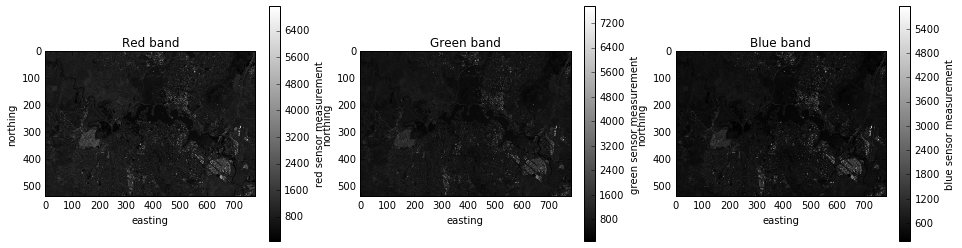

In [14]:
# show the images of bands at itime=0,1, 10

show_images(nbar, 1)

Each band is a grayscale image. They can be combined to make a better image.

In [15]:
# define a scale function to strech an image 

def scale_array(arr, prcnt, min_val, max_val, nan_val):
    """
    Linearly scales array 'arr' at the 'prcnt' percentile between 'min_val' and 'max_val', 
    replacing 'nan_val' values with NaN's.
    #f_arr = 1.0*arr #.astype('float')    # required for NaN's 
    """
  
    f_arr = arr.astype('float')
    #f_arr[f_arr==nan_val] = np.nan
    prcnt_delta = (100-prcnt)/2
    clip_lim = np.nanpercentile(f_arr,(prcnt_delta,100-prcnt_delta))
    f_arr = np.clip(f_arr,clip_lim[0],clip_lim[1])
    f_arr = (f_arr-clip_lim[0]) / (clip_lim[1]-clip_lim[0])
    f_arr = f_arr * (max_val-min_val) + min_val
    
    return f_arr


In [16]:
def make_rgb_images(nbar, itime):
    """
    Create a RGB image using bands acquired at itime
    """
    print ("RGB image acquired in datetime ", nbar.time.values[itime])
        
    red_img=nbar.red.isel(time=itime)
    green_img=nbar.green.isel(time=itime)
    blue_img = nbar.blue.isel(time=itime)


    plt.figure( figsize=(16,12) )
    
    red_img=nbar.red.isel(time=itime)
    green_img=nbar.green.isel(time=itime)
    blue_img = nbar.blue.isel(time=itime)
    y_size = red_img.shape[0]; x_size = red_img.shape[1]

    print (y_size,x_size)
    #print red_img.shape

    sB1data = scale_array(red_img, 99.0, 0, 255, -999)
    sB2data = scale_array(green_img, 99.0, 0, 255, -999)
    sB3data = scale_array(blue_img, 99.0, 0, 255, -999)


    rgb_image = np.zeros((y_size, x_size, 3), dtype='uint8')
    rgb_image[:,:,0] = sB1data; 
    rgb_image[:,:,1] = sB2data; 
    rgb_image[:,:,2] = sB3data

    plt.imshow(rgb_image, interpolation='none') 
    plt.title('Landsat Image Over Canberra Region')
    plt.ylabel('northing'); plt.xlabel('easting');

('RGB image acquired in datetime ', numpy.datetime64('2015-01-03T10:50:43.500000000+1100'))
(539, 780)


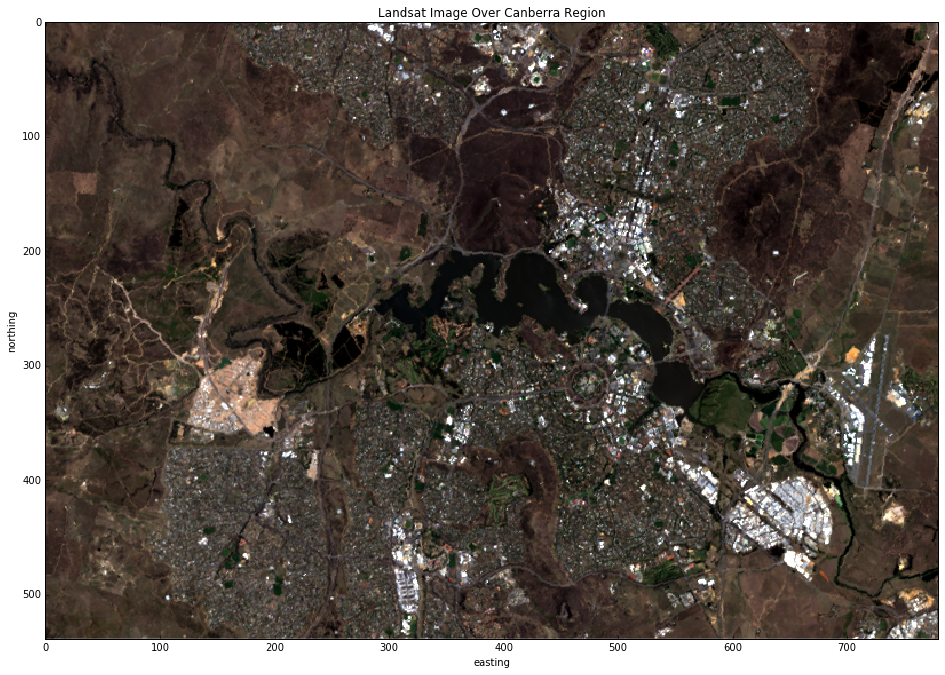

In [17]:
# good images: 0, 1, 10
# cloudy images: itime=2,4, 5, 6,8,9
# no-data blank tiles: 3, 7

make_rgb_images(nbar, 1)

## Group  by solar day function

- There is a bit of overlap between two adjacent scenes ("cut").
- To remove the overlap duplication, we combine the data slices with datetimes less than a minute apart.  


In [18]:
nbar_by_solar_day = dc.load(product='ls8_nbar_albers', x=xp, y=yp, time=tp, group_by='solar_day')
len(nbar_by_solar_day.time)

42

Now we have only 42 time slices of data, fewer than the 75 found previously without solar-day-grouping

According to Landsat cycle 16 days, 365/16 = 22 re-visit a place at least. 

Here we have 42 days over Canberra reflect the overlap between passes. 

Can be checked in the Clear Observation Layer at: http://eos-test.ga.gov.au/geoserver/www/remote_scripts/WOfS_v1.6.htm

('Showing images acquired in datetime ', numpy.datetime64('2015-01-03T11:00:00.000000000+1100'))


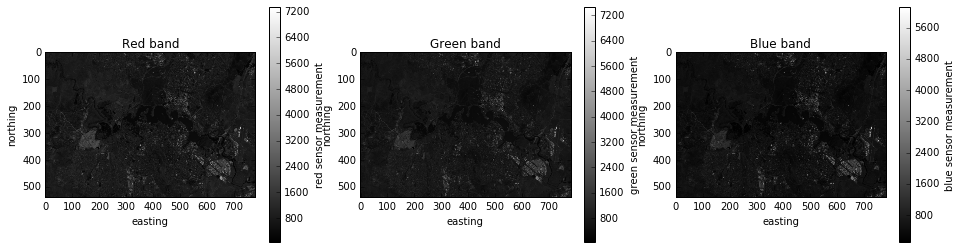

In [19]:
# show the images of bands at itime=0,1,2,3,4,... 10

show_images(nbar_by_solar_day, 0)

## Clear-sky images and cloudy images, we have to deal with in AGDC


('RGB image acquired in datetime ', numpy.datetime64('2015-01-19T11:00:00.000000000+1100'))
(539, 780)


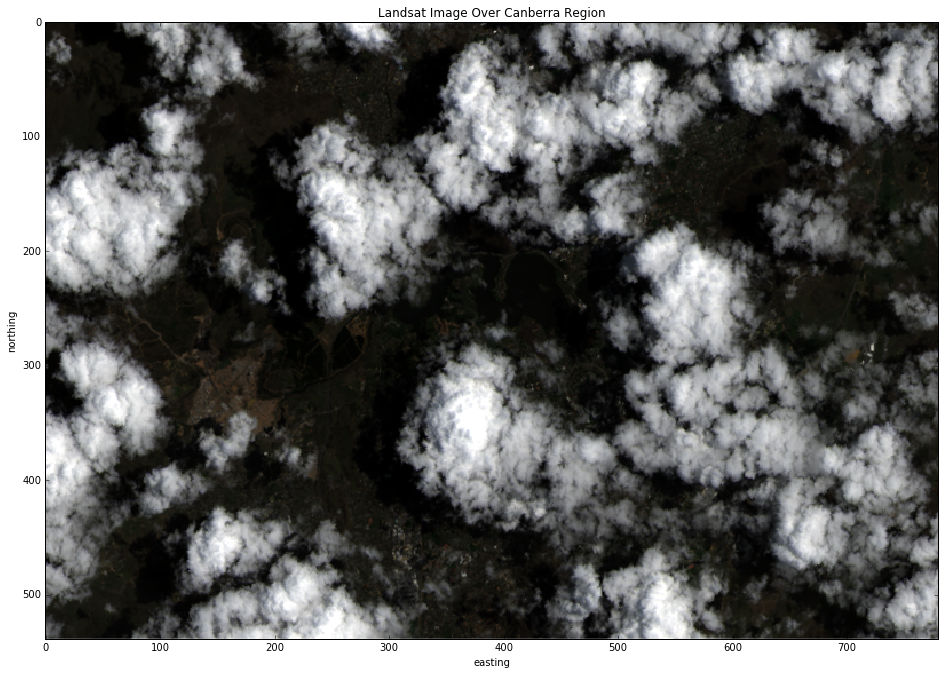

In [20]:
# 0, 5, 8 not cloudy
# 1,2,3,4 cloudy day
make_rgb_images(nbar_by_solar_day, 2)

##  Applications based on AGDC

### Derive information products 
### Must identify and remove invalid observations: cloud, shadow, satuared pixels

### Band maths: combine the bands to derive new variables (artificial bands)

-  Normalized Difference Vegetation Index, NDVI
-  Normalized Difference Water Index,  NDWI
-  These index can help to clearly identify certain land cover features: Vegetation, water bodies

In [21]:
#  from datacube.storage import masking

bands = dc.load(product='ls8_nbar_albers', x=xp, y=yp, time=tp, measurements=['red', 'nir', 'green', 'swir1'], 
                group_by='solar_day')
red = bands.red.where(bands.red != bands.red.attrs['nodata'])
nir = bands.nir.where(bands.nir != bands.nir.attrs['nodata'])
                    
green = bands.green.where(bands.green != bands.green.attrs['nodata'])
swir1 = bands.swir1.where(bands.swir1 != bands.swir1.attrs['nodata'])

# Retrieve the associated Pixel Quality datasets
pq = dc.load(product='ls8_pq_albers', x=xp, y=yp,  time=tp, group_by='solar_day')

cloud_free = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True).pixelquality



### Compute Indexes: NDVI and NDWI

#### Numpy array arithmetics without looping

In [22]:

# Normalized Differenc Vegetation Index: Red and near Infrared bands

ndvi = ((nir - red) / (nir + red)).where(cloud_free)

# Normalized Differenc Water Index: Green and Shortwave Infrared Bands

ndwi = ((swir1- green)/(green + swir1)).where(cloud_free)

#ndwi = ((green- swir1)/(green + swir1)).where(cloud_free)

ndvi.shape


(42, 539, 780)

In [23]:
ndwi.shape

(42, 539, 780)

In [24]:
# skip ndvi plots 
#ndvi.plot(col='time', col_wrap=6)

###  Weed out the low quality images.

In [25]:
# xarray.Dataset.sum to reduce the datasets by selecting the time slices with high percentage cloud-free pixels

cloudfreeRatio = 0.8  # threshold of cloud pixel 80%

mostly_cloud_free = cloud_free.sum(dim=('x','y')) > (cloudfreeRatio * cloud_free.size / cloud_free.time.size)

print(mostly_cloud_free)

<xarray.DataArray 'pixelquality' (time: 42)>
array([ True, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False], dtype=bool)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-03 2015-01-10 2015-01-19 ...


In [26]:
# How many images selected?

mostly_cloud_free.sum().values

array(10)

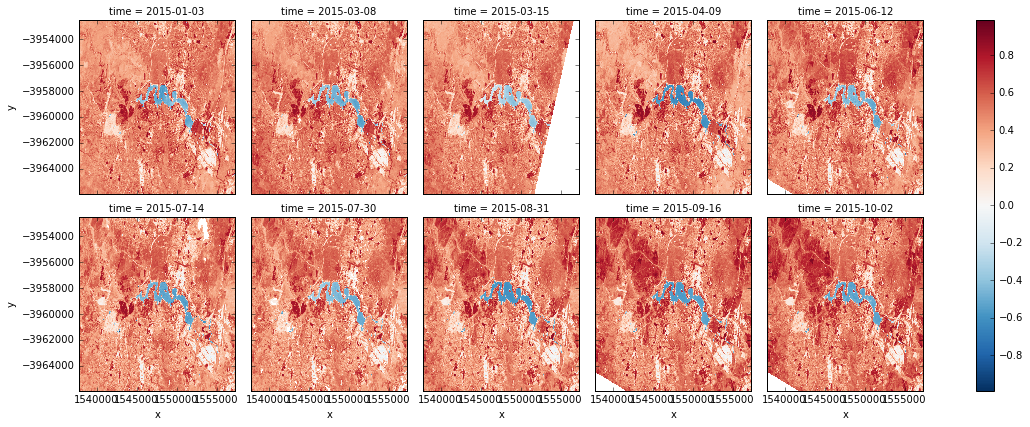

In [27]:
# Apply the time-dim mask to the 3D-array (time, x, y)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
mostly_good_ndvi.plot(col='time', col_wrap=5)

## Normalised Difference Water Index

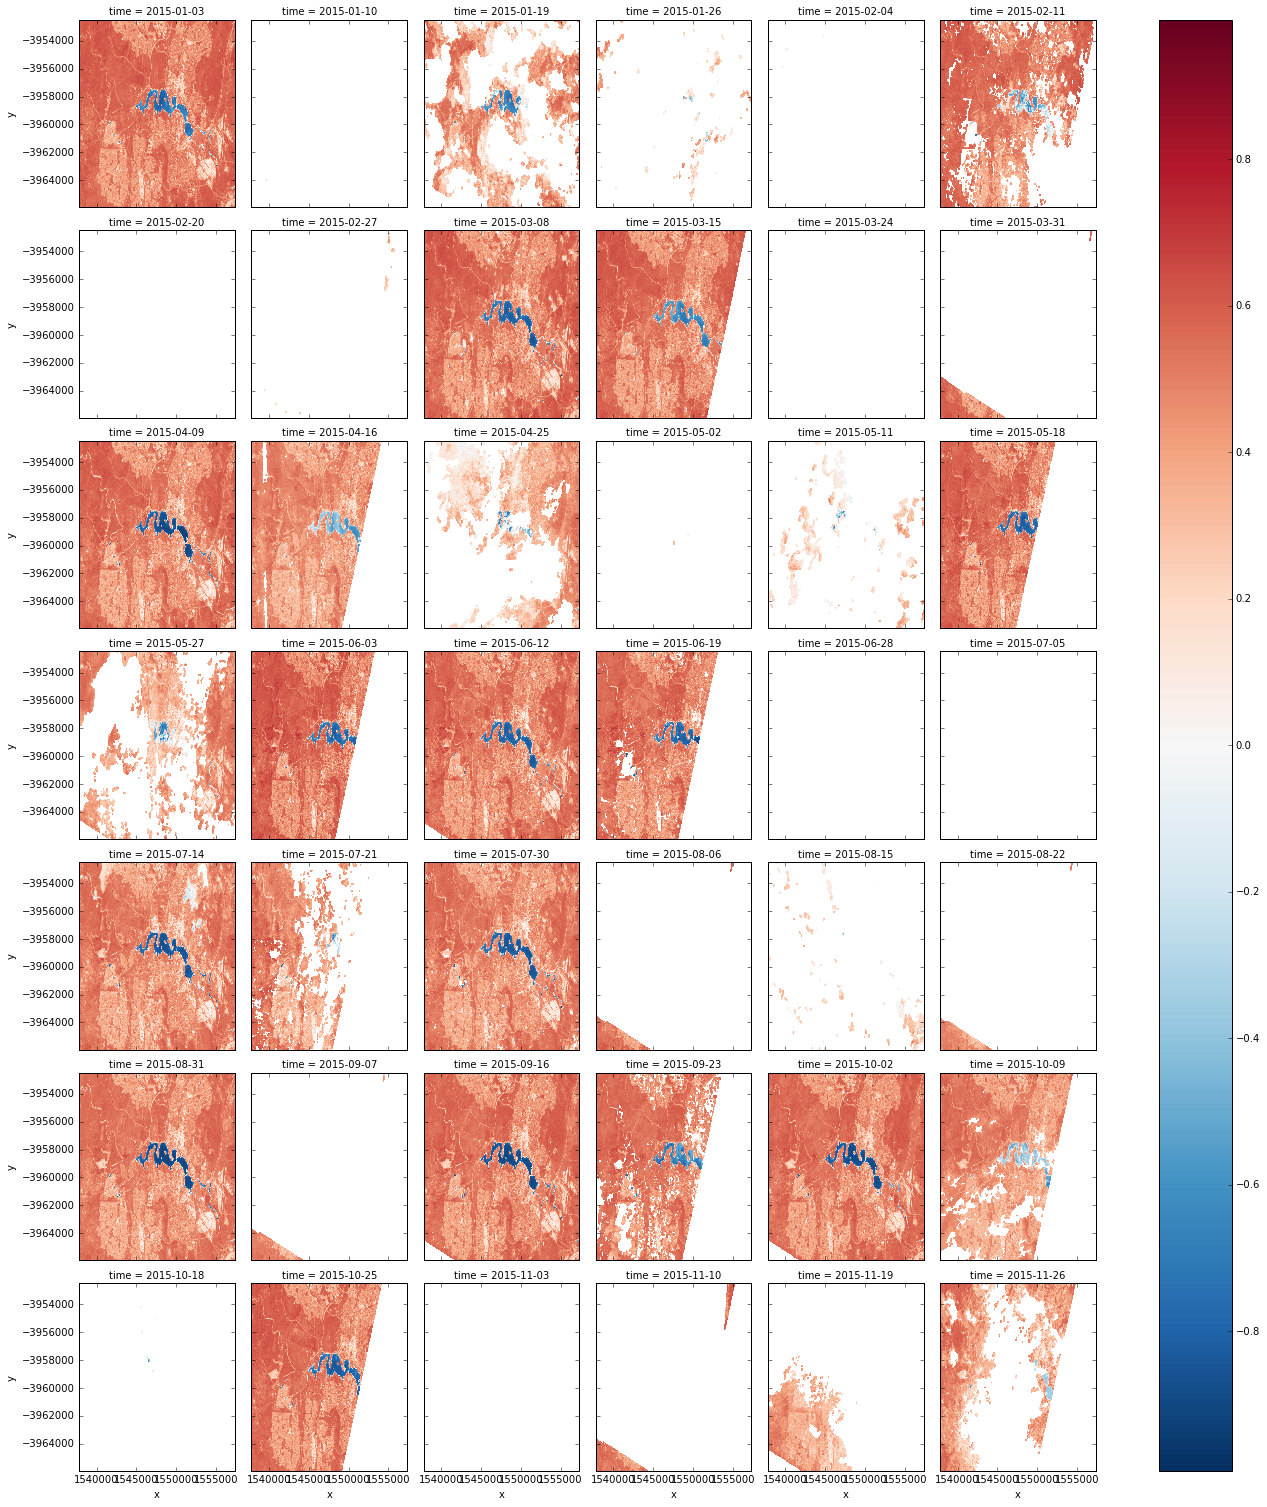

In [37]:
# images after removed invalid pixels. 
ndwi.plot(col='time', col_wrap=6)


### Weed out the low quality images.

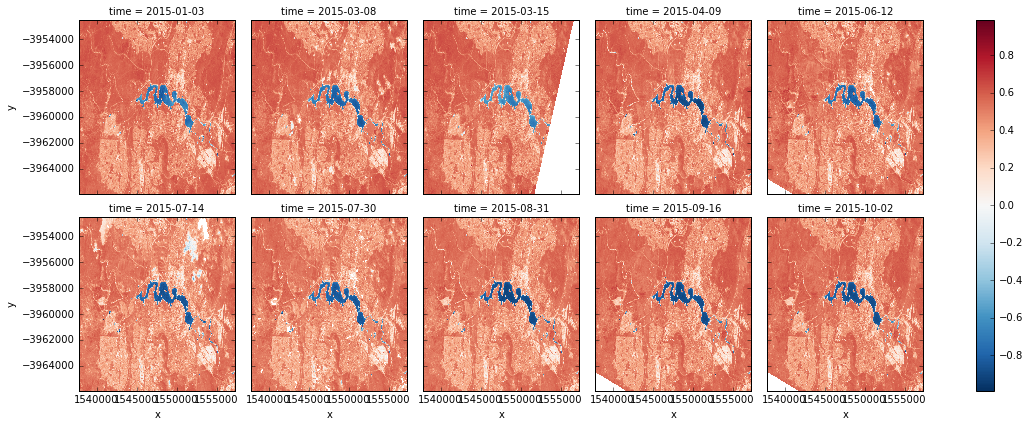

In [29]:
# apply the cloud_threshold mask, which will select a subset images with good pixels. 

mostly_good_ndwi = ndwi.where(mostly_cloud_free).dropna('time', how='all')

mostly_good_ndwi.plot(col='time', col_wrap=5)

## Statistics Median and Mean Images

### Normalised Vegetation Index vs Water Index

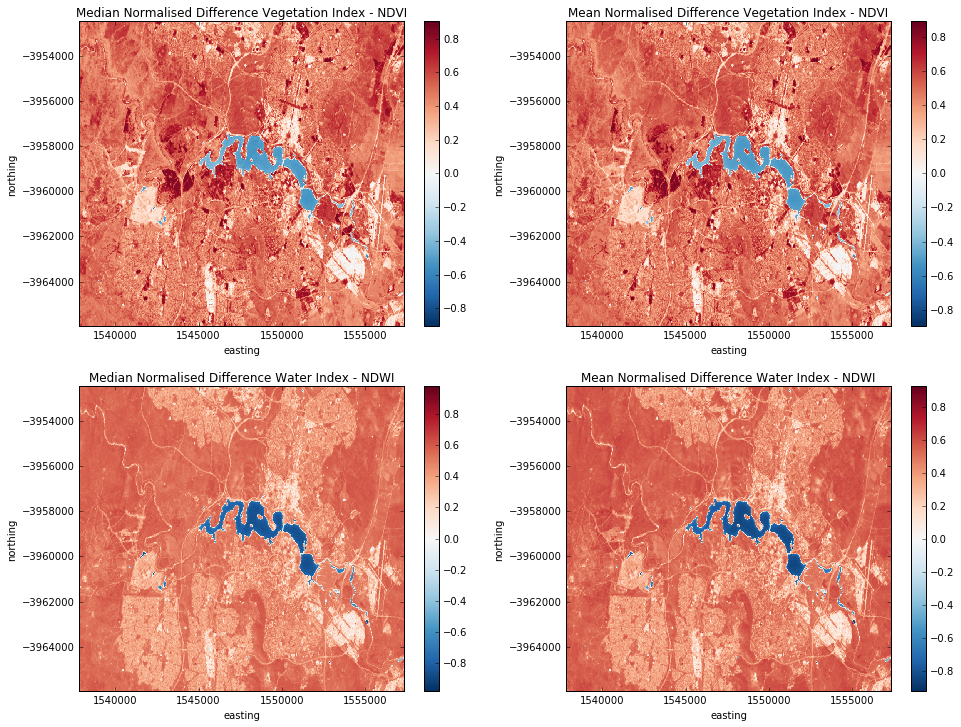

In [30]:
plt.figure( figsize=(16,12) )
    
plt.subplot( 2,2,1 )
mostly_good_ndvi.median(dim='time').plot()
plt.title("Median Normalised Difference Vegetation Index - NDVI"); plt.xlabel('easting'); plt.ylabel('northing')


plt.subplot( 2,2,2 )
mostly_good_ndvi.mean(dim='time').plot()
# ndvi.mean(dim='time').plot()
plt.title("Mean Normalised Difference Vegetation Index - NDVI"); plt.xlabel('easting'); plt.ylabel('northing')

#------------------------------
plt.subplot( 2,2,3 )
mostly_good_ndwi.median(dim='time').plot()
plt.title("Median Normalised Difference Water Index - NDWI"); plt.xlabel('easting'); plt.ylabel('northing')


plt.subplot( 2,2,4 )
mostly_good_ndwi.mean(dim='time').plot()
# ndwi.mean(dim='time').plot()
plt.title("Mean Normalised Difference Water Index - NDWI"); plt.xlabel('easting'); plt.ylabel('northing')

# Water Observation from Space

http://eos-test.ga.gov.au/geoserver/www/remote_scripts/WOfS_v1.6.htm


## Elevation

In [31]:
grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35))
grid.elevation

<xarray.DataArray 'elevation' (time: 1, latitude: 361, longitude: 361)>
array([[[ 599.35198975,  599.2019043 ,  599.92163086, ...,  642.1114502 ,
          644.62225342,  646.61938477],
        [ 598.67871094,  599.04290771,  599.92175293, ...,  639.90118408,
          642.4821167 ,  644.61102295],
        [ 599.94976807,  600.19146729,  600.48449707, ...,  637.94317627,
          640.34350586,  642.35424805],
        ..., 
        [ 621.86993408,  620.94445801,  619.77789307, ...,  565.94726562,
          565.16882324,  564.86773682],
        [ 623.37213135,  622.32537842,  621.19500732, ...,  565.94683838,
          565.37609863,  565.03039551],
        [ 624.5581665 ,  623.46069336,  622.24786377, ...,  566.50402832,
          566.27264404,  565.9118042 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-17T08:33:00
  * latitude   (latitude) float64 -35.25 -35.25 -35.25 -35.25 -35.25 -35.25 ...
  * longitude  (longitude) float64 149.1 149.1 149.1 149.1 149.

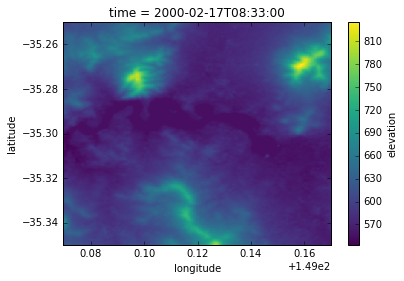

In [32]:
grid.elevation[0].plot()

## Reprojection

In [33]:
!getfacl /g/data/v10/projects/ingest_test_data/milestone1/dsm1sv1_0_Clean/


getfacl: Removing leading '/' from absolute path names
# file: g/data/v10/projects/ingest_test_data/milestone1/dsm1sv1_0_Clean/
# owner: gxr547
# group: v10
# flags: -s-
user::rwx
group::r-x
group:v10_w:rwx
mask::rwx
other::r-x
default:user::rwx
default:group::r-x
default:group:v10_w:rwx
default:mask::rwx
default:other::r-x



In [34]:
albers_grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35), 
                      output_crs='EPSG:3577', resolution=(-25,25))
albers_grid.elevation.shape

(1, 490, 420)

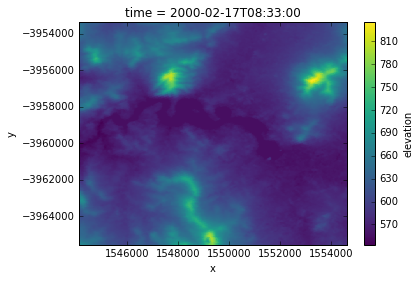

In [35]:
albers_grid.elevation[0].plot()